In [1]:
import cf_xarray
import gribberish
import xarray as xr

ds = xr.open_dataset('./hrrr.t23z.wrfsubhf01.grib2', engine='gribberish', only_variables=['prate', 'tmp'], filter_by_attrs={'generating_process': 'forecast', 'statistical_process': ''})
ds

<xarray.Dataset>
Dimensions:    (time: 4, y: 1059, x: 1799)
Coordinates:
  * time       (time) datetime64[ns] 2023-07-15T23:15:00 ... 2023-07-16
  * y          (y) float64 -1.581e+06 -1.578e+06 ... 1.59e+06 1.593e+06
  * x          (x) float64 -2.701e+06 -2.698e+06 ... 2.69e+06 2.693e+06
    latitude   (y, x) float64 ...
    longitude  (y, x) float64 ...
Data variables:
    prate      (time, y, x) float64 ...
    tmp        (time, y, x) float64 ...
Attributes:
    meta:     Generated with gribberishpy

CPU times: user 1.2 s, sys: 92.7 ms, total: 1.29 s
Wall time: 1.32 s


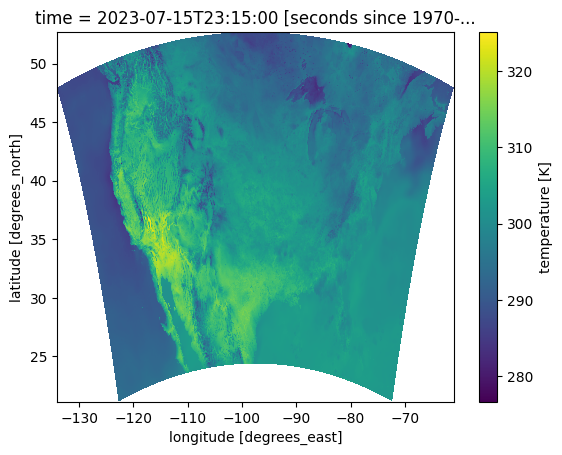

In [2]:
%%time
ds.tmp.cf.isel(time=0).plot(x='longitude', y='latitude')

In [4]:
import pyproj
to_xy = pyproj.Transformer.from_crs('epsg:4326', ds.tmp.crs, always_xy=True).transform

In [5]:
lat, lng = 41.42717976016072, -71.462122760827

x_sel, y_sel = to_xy(lng, lat)

lat_selected = ds['latitude'].sel(x=x_sel, y=y_sel, method='nearest')
print(lat_selected.values)

lng_selected = ds['longitude'].sel(x=x_sel, y=y_sel, method='nearest')
print(lng_selected.values)

selected = ds.prate.sel(x=x_sel, y=y_sel, method='nearest')
selected.values

41.41992272540395
-71.47008808568133


array([0., 0., 0., 0.])